In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Hi")

Hi


In [8]:
import pandas as pd

df = pd.read_excel("data/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Check the size of the dataset (rows, columns)
df.shape


(541909, 8)

In [ ]:
# Inspect column names, data types, and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Generate summary statistics for numerical columns
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
# Count missing values per column
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Identify cancelled invoices (InvoiceNo starting with 'C')
df[df["InvoiceNo"].astype(str).str.startswith("C")].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
# Identify rows with zero or negative quantities
df[df["Quantity"] <= 0].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
# Create a clean copy of the dataset to preserve the original data
df_clean = df.copy()

# Remove cancelled invoices
df_clean = df_clean[~df_clean["InvoiceNo"].astype(str).str.startswith("C")]

# Remove negative or zero quantities
df_clean = df_clean[df_clean["Quantity"] > 0]

# Remove missing CustomerID
df_clean = df_clean.dropna(subset=["CustomerID"])

# Check the resulting dataset size after cleaning
df_clean.shape


(397924, 8)

In [ ]:
# Convert CustomerID to integer
# Customer identifiers should not be floats
df_clean["CustomerID"] = df_clean["CustomerID"].astype(int)


In [19]:
# Convert InvoiceDate to datetime format
# Enables time-based analysis
df_clean["InvoiceDate"] = pd.to_datetime(df_clean["InvoiceDate"])


In [21]:
# Calculate revenue per transaction
# Revenue = Quantity * UnitPrice
df_clean["Revenue"] = df_clean["Quantity"] * df_clean["UnitPrice"]

In [22]:
# Preview cleaned and enriched dataset
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [23]:
# Create a Year-Month column for time-based aggregation
df_clean["YearMonth"] = df_clean["InvoiceDate"].dt.to_period("M")

In [24]:
# Calculate total revenue per month
monthly_revenue = (
    df_clean
    .groupby("YearMonth")["Revenue"]
    .sum()
    .reset_index()
)

monthly_revenue.head()


,YearMonth,Revenue
0,2010-12,572713.890
1,2011-01,569445.040
2,2011-02,447137.350
3,2011-03,595500.760
4,2011-04,469200.361


In [25]:
# Convert Period to Timestamp for plotting
monthly_revenue["YearMonth"] = monthly_revenue["YearMonth"].dt.to_timestamp()

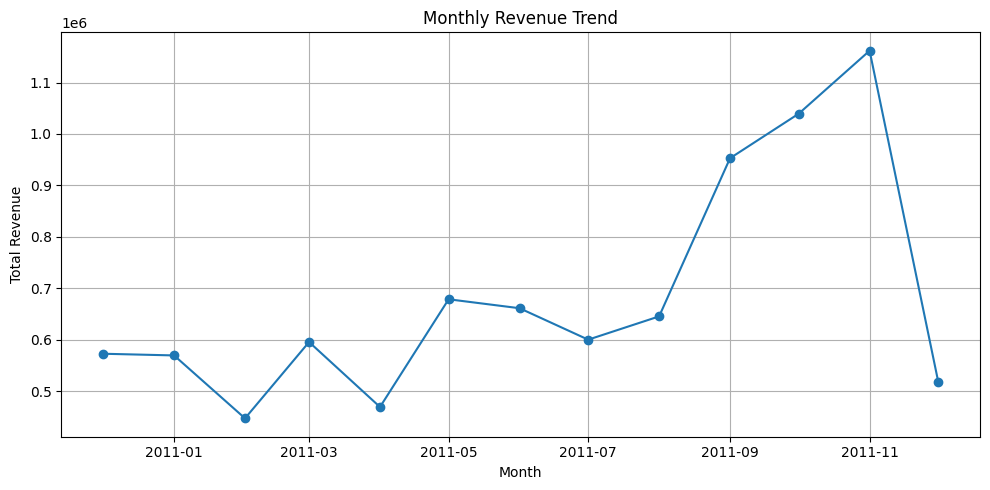

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_revenue["YearMonth"],
    monthly_revenue["Revenue"],
    marker="o"
)

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# Count number of purchases per customer
customer_orders = (
    df_clean
    .groupby("CustomerID")["InvoiceNo"]
    .nunique()
    .reset_index(name="NumOrders")
)

customer_orders.head()

,CustomerID,NumOrders
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [28]:
# Classify customers as one-time or repeat
customer_orders["CustomerType"] = customer_orders["NumOrders"].apply(
    lambda x: "Repeat Customer" if x > 1 else "One-Time Customer"
)

customer_orders["CustomerType"].value_counts()

CustomerType
Repeat Customer      2845
One-Time Customer    1494
Name: count, dtype: int64

In [29]:
# Merge customer type back into main dataset
df_customer = df_clean.merge(
    customer_orders[["CustomerID", "CustomerType"]],
    on="CustomerID",
    how="left"
)

df_customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,YearMonth,CustomerType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,Repeat Customer
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Repeat Customer
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,Repeat Customer
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Repeat Customer
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,Repeat Customer


In [30]:
# Calculate revenue contribution by customer type
revenue_by_type = (
    df_customer
    .groupby("CustomerType")["Revenue"]
    .sum()
    .reset_index()
)

revenue_by_type

,CustomerType,Revenue
0,One-Time Customer,616311.731
1,Repeat Customer,8295096.173


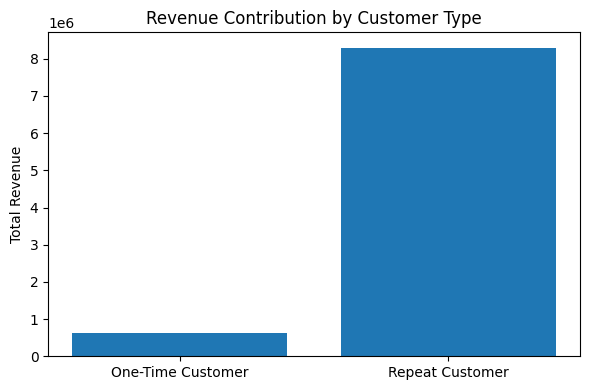

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(
    revenue_by_type["CustomerType"],
    revenue_by_type["Revenue"]
)

plt.title("Revenue Contribution by Customer Type")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

In [32]:
# Top 10 products by total revenue
top_products = (
    df_clean
    .groupby("Description")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_products

,Description,Revenue
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,REGENCY CAKESTAND 3 TIER,142592.95
2,WHITE HANGING HEART T-LIGHT HOLDER,100448.15
3,JUMBO BAG RED RETROSPOT,85220.78
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
5,POSTAGE,77803.96
6,PARTY BUNTING,68844.33
7,ASSORTED COLOUR BIRD ORNAMENT,56580.34
8,Manual,53779.93
9,RABBIT NIGHT LIGHT,51346.20


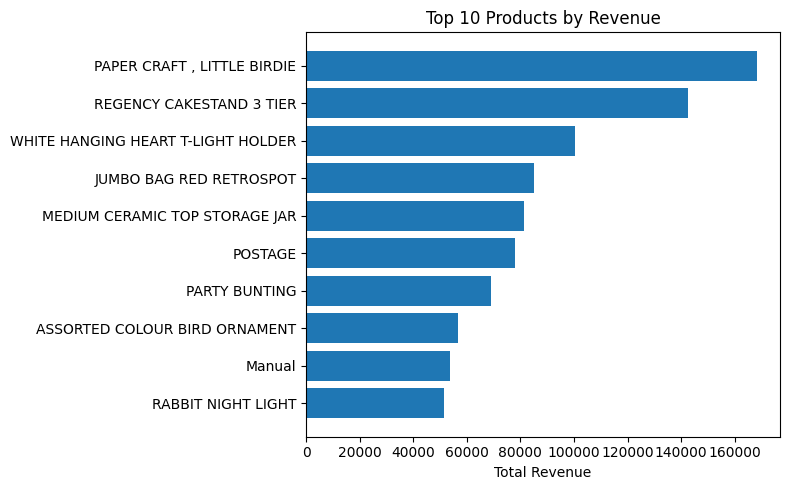

In [33]:
plt.figure(figsize=(8, 5))
plt.barh(
    top_products["Description"],
    top_products["Revenue"]
)
plt.gca().invert_yaxis()

plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.tight_layout()
plt.show()

In [34]:
# Top 10 customers by total revenue
top_customers = (
    df_clean
    .groupby("CustomerID")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_customers

,CustomerID,Revenue
0,14646,280206.02
1,18102,259657.30
2,17450,194550.79
3,16446,168472.50
4,14911,143825.06
5,12415,124914.53
6,14156,117379.63
7,17511,91062.38
8,16029,81024.84
9,12346,77183.60


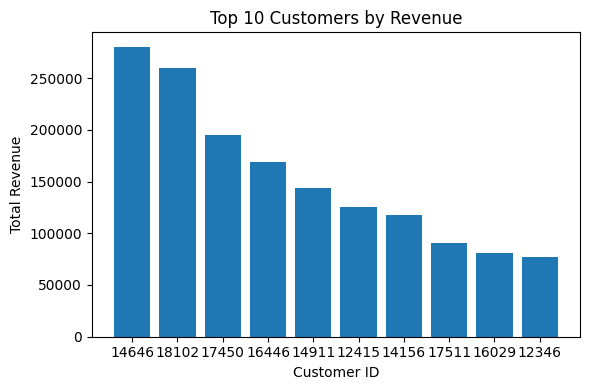

In [35]:
plt.figure(figsize=(6, 4))
plt.bar(
    top_customers["CustomerID"].astype(str),
    top_customers["Revenue"]
)

plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

## Summary & Key Takeaways

- Revenue shows clear variation over time, highlighting seasonal or demand-driven patterns.
- Repeat customers contribute a disproportionately large share of total revenue compared to one-time customers.
- A small number of products and customers drive a significant portion of overall revenue.
- Improving customer retention and focusing on high-performing products could meaningfully improve business performance.
